# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 569


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key #MyCode

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city #MyCode
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
        
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #MyCode
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] #MyCode
        city_lng = city_weather['coord']['lon'] #MyCode
        city_max_temp = city_weather['main']['temp_max'] #MyCode
        city_humidity = city_weather['main']['humidity'] #MyCode
        city_clouds = city_weather['clouds']['all'] #MyCode
        city_wind = city_weather['wind']['speed'] #MyCode
        city_country = city_weather['sys']['country'] #MyCode
        city_date = city_weather['dt'] #MyCode

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ola
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | colonia
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | gizo
Processing Record 8 of Set 1 | markovo
Processing Record 9 of Set 1 | port glaud
City not found. Skipping...
Processing Record 10 of Set 1 | antofagasta
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | heunghae
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | leer
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | santa cruz
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | at-bashi
Processing Record 22 of Set 1 | port mathurin
Processing

Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | palia kalan
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | lerwick
Processing Record 42 of Set 4 | mili
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | villa allende
Processing Record 45 of Set 4 | rio grande
Processing Record 46 of Set 4 | tsetserleg
Processing Record 47 of Set 4 | basco
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | saipan
Processing Record 0 of Set 5 | san matias
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | isabel segunda
Processing Record 3 of Set 5 | pansoy
Processing Record 4 of Set 5 | grand island
Processing Record 5 of Set 5 | mukah
City not found. Skipping...
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | freeport
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | lazaro cardenas
Processing Record 10 of Set 5 | puerto armuelles
Proce

Processing Record 33 of Set 8 | palmer
Processing Record 34 of Set 8 | siwa oasis
Processing Record 35 of Set 8 | cafayate
Processing Record 36 of Set 8 | happy valley-goose bay
Processing Record 37 of Set 8 | chardara
Processing Record 38 of Set 8 | zeya
Processing Record 39 of Set 8 | bodo
Processing Record 40 of Set 8 | levuka
Processing Record 41 of Set 8 | cartagena
Processing Record 42 of Set 8 | holualoa
Processing Record 43 of Set 8 | bibbiena
Processing Record 44 of Set 8 | shevchenkove
Processing Record 45 of Set 8 | marquette
Processing Record 46 of Set 8 | pangai
Processing Record 47 of Set 8 | taltal
Processing Record 48 of Set 8 | blair
Processing Record 49 of Set 8 | ettrick
Processing Record 0 of Set 9 | bubaque
Processing Record 1 of Set 9 | puerto santa
Processing Record 2 of Set 9 | tvoroyri
Processing Record 3 of Set 9 | touros
Processing Record 4 of Set 9 | pasighat
Processing Record 5 of Set 9 | alice springs
Processing Record 6 of Set 9 | mapastepec
Processing Re

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) #MyCode

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ola,59.5833,151.2833,8.68,87,100,0.61,RU,1718672065
1,adamstown,-25.0660,-130.1015,22.62,83,100,6.40,PN,1718672066
2,lihue,21.9789,-159.3672,30.58,69,75,6.17,US,1718672066
3,margaret river,-33.9500,115.0667,15.20,73,98,7.76,AU,1718672066
4,colonia,50.9333,6.9500,16.09,90,0,1.03,DE,1718672066


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
import os
cwd = os.getcwd()
cwd

'/Users/eddie/Desktop/Module 6/starter_code'

In [13]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ola,59.5833,151.2833,8.68,87,100,0.61,RU,1718672065
1,adamstown,-25.0660,-130.1015,22.62,83,100,6.40,PN,1718672066
2,lihue,21.9789,-159.3672,30.58,69,75,6.17,US,1718672066
3,margaret river,-33.9500,115.0667,15.20,73,98,7.76,AU,1718672066
4,colonia,50.9333,6.9500,16.09,90,0,1.03,DE,1718672066


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

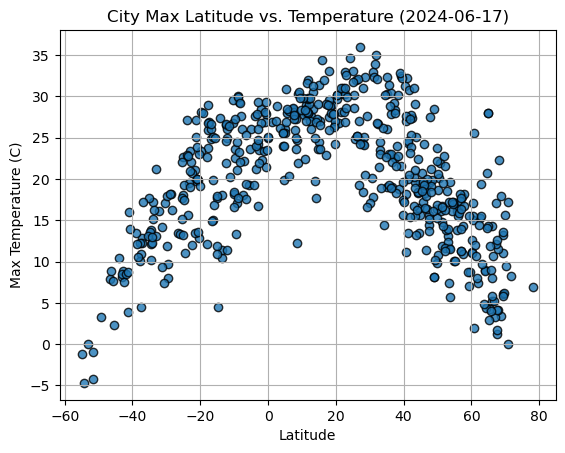

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker ='o', alpha=.8, edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

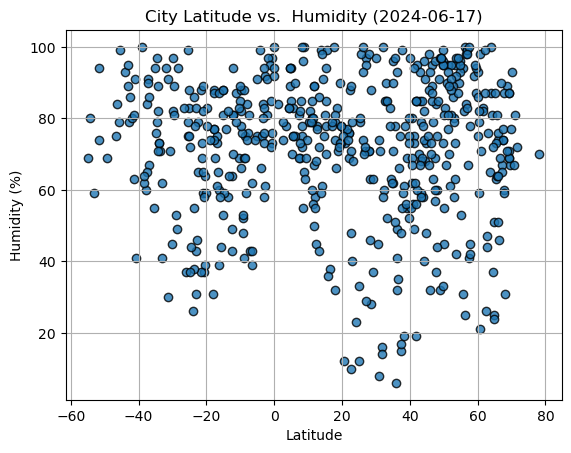

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker ='o', alpha=.8, edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs.  Humidity ({date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

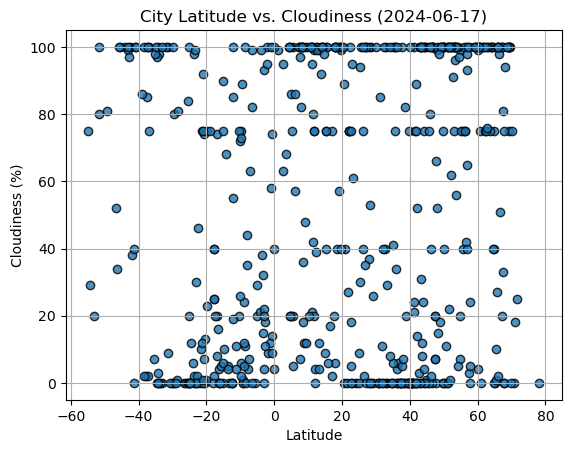

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', alpha=.8, edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

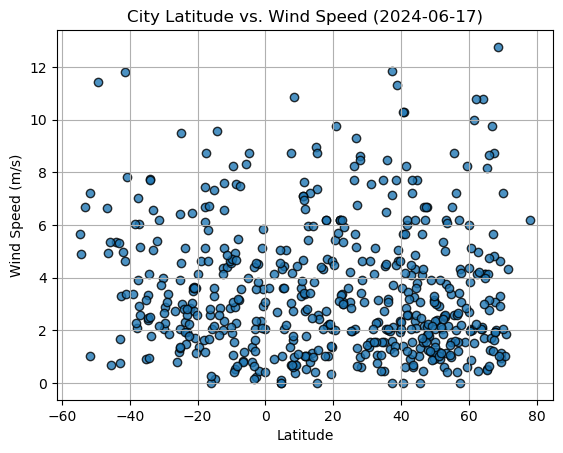

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker ='o', alpha=.8, edgecolor="black")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
date = datetime.now()
date = date.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ola,59.5833,151.2833,8.68,87,100,0.61,RU,1718672065
2,lihue,21.9789,-159.3672,30.58,69,75,6.17,US,1718672066
4,colonia,50.9333,6.9500,16.09,90,0,1.03,DE,1718672066
5,stanley,54.8680,-1.6985,10.03,96,20,1.54,GB,1718672066
7,markovo,57.3206,107.0881,17.80,41,3,4.31,RU,1718672066


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.62,83,100,6.40,PN,1718672066
3,margaret river,-33.9500,115.0667,15.20,73,98,7.76,AU,1718672066
6,gizo,-8.1030,156.8419,27.65,84,44,5.45,SB,1718672066
8,antofagasta,-23.6500,-70.4000,15.60,86,98,2.33,CL,1718672067
9,grytviken,-54.2811,-36.5092,-4.70,80,29,4.90,GS,1718672067


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.7533981448575655


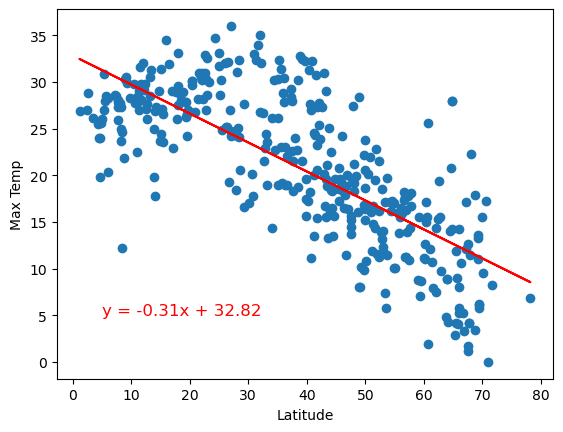

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,5),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7687438549076702


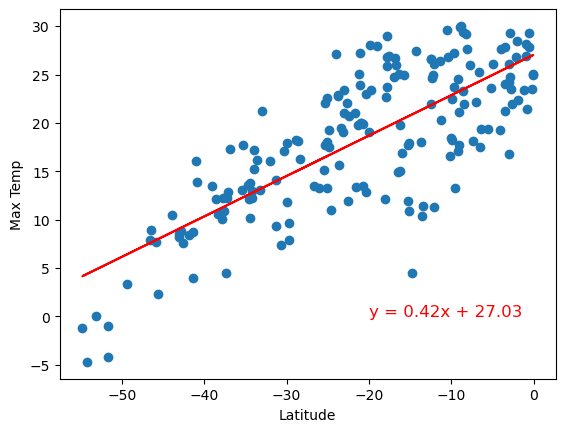

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,0),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** Both linear relationships are strong for the Southern Hemisphere and Northern Hemisphere. In the Northern Hemisphere, the higher the Latitude, the lower the temperature. In the Southern Hemispehere, the higher the Latitude, the higher the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.010095968046025139


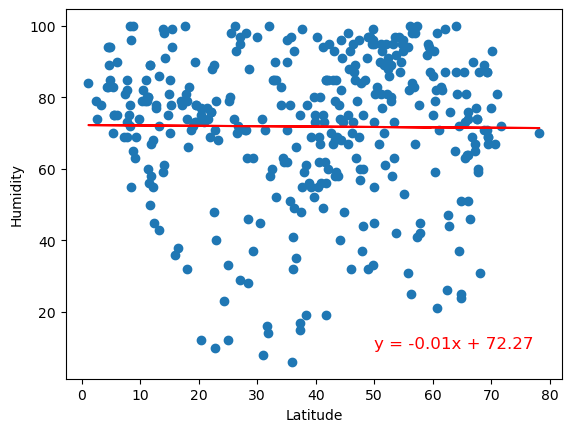

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =  northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.014056689684808108


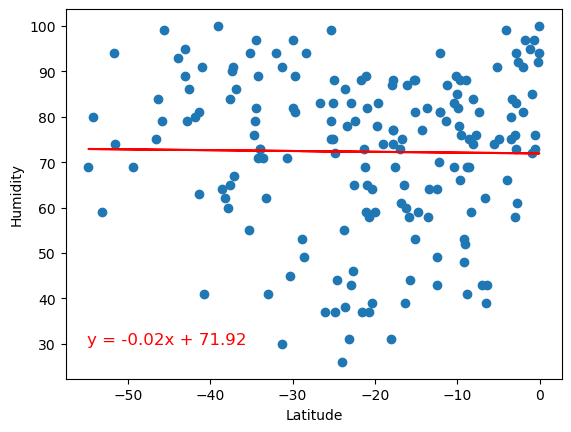

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** There is very little correlation between humidity and latitude in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.02122793677254836


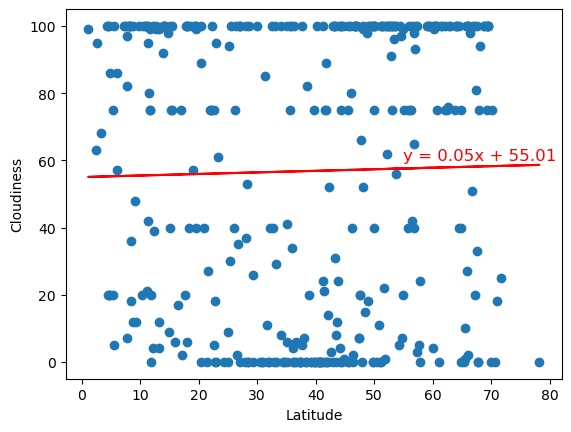

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =  northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(55,60),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.2492047682899219


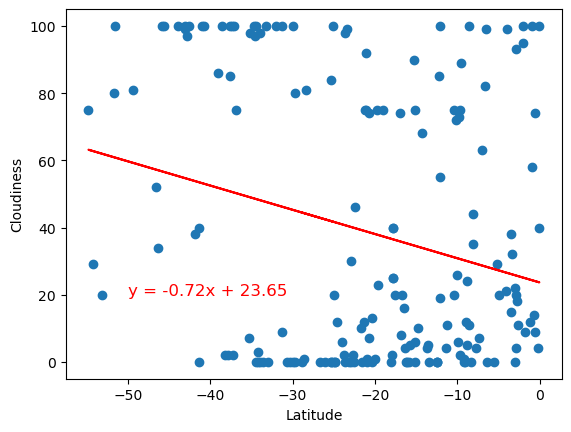

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** In the northern hemispere, there is little to no correlation between latitude and cloudiness. However, in the southern hemispere there is a much stronger negative correlation that indicates as the latitude decreases, the cloudiness increases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.008240028776831108


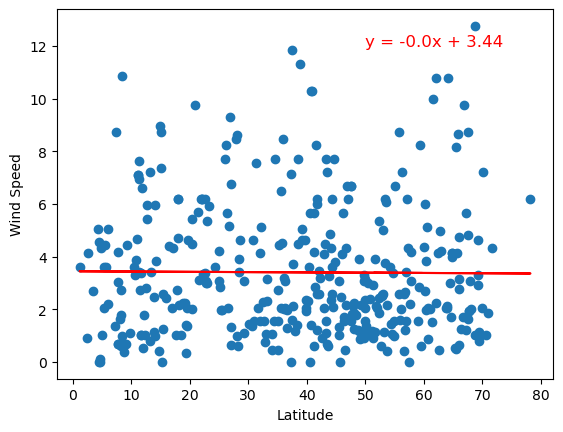

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values =  northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,12),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.21458194682828435


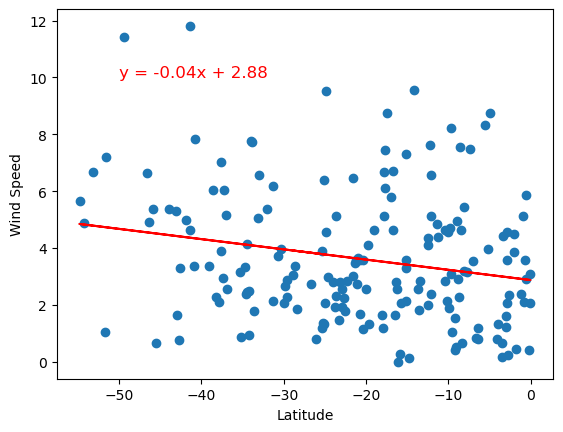

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,10),fontsize=12,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is little to no correlation between latitude and wind wind speed. However, in the southern hemisphere there is a slight negative correlation indicating that as the latitude decreases, the wind speed increases.